# Linear Regression Slope (LRS)

https://library.tradingtechnologies.com/trade/chrt-ti-linear-regression-slope.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol1 = 'AAPL'
symbol2 = 'QQQ'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df1 = yf.download(symbol1,start,end)
df2 = yf.download(symbol2,start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [3]:
# View Columns
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,198.478760,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,204.280457,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,204.871445,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,205.935257,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.004639,25587400


In [4]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,176.860001,177.649994,176.100006,177.119995,175.977173,37101900
2018-08-02,175.869995,179.740005,175.789993,179.529999,178.371628,47178200
2018-08-03,179.869995,180.089996,179.080002,180.080002,178.918091,28934400
2018-08-06,179.960007,181.190002,179.740005,181.139999,179.971237,24808800
2018-08-07,181.649994,182.139999,181.259995,181.800003,180.626999,29895700


In [5]:
avg1 = df1['Adj Close'].mean()
avg2 = df2['Adj Close'].mean()
df1['AVGS1_S1'] = avg1 - df1['Adj Close']
df1['AVGS2_S2'] = avg2 - df2['Adj Close']
df1['Average_SQ'] = df1['AVGS1_S1']**2
df1['AVG_AVG'] = df1['AVGS1_S1']*df1['AVGS2_S2']

In [6]:
sum_sq = df1['Average_SQ'].sum()
sum_avg = df1['AVG_AVG'].sum()
slope = sum_avg/sum_sq
intercept = avg2-(slope*avg1)

In [7]:
m = (df1['Adj Close']-df1['Adj Close'].mean())*(df2['Adj Close']-df2['Adj Close'].mean())/(df1['Adj Close']-df1['Adj Close'].mean())

In [8]:
n = 20
df1['Slope'] = m.rolling(n).mean()

Text(0.5,0,'Date')

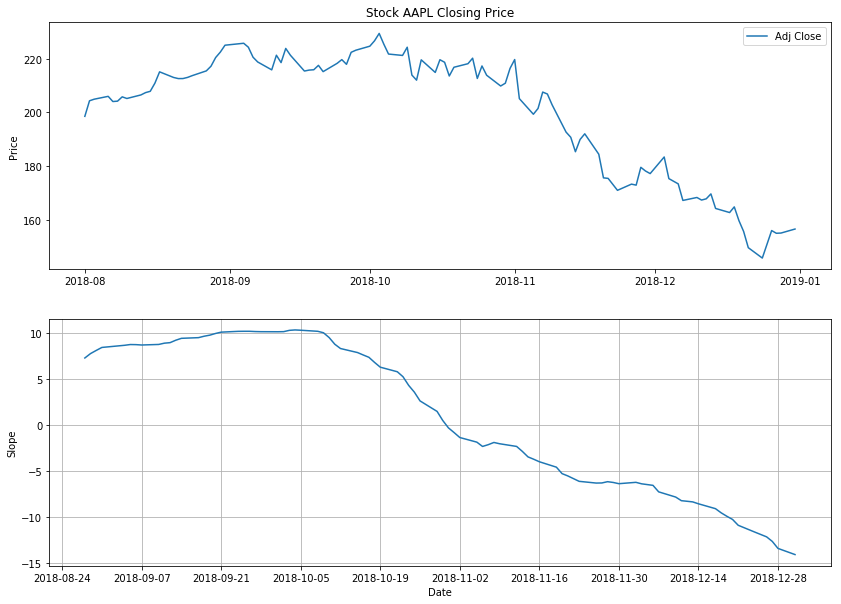

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df1['Adj Close'])
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
#df1['VolumePositive'] = df1['Open'] < df1['Adj Close']
#colors = df1.VolumePositive.map({True: 'g', False: 'r'})
#ax2.bar(df1.index, df1['Volume'], color=colors, alpha=0.4)
ax2.plot(df1['Slope'], label='Slope')
ax2.grid()
ax2.set_ylabel('Slope')
ax2.set_xlabel('Date')

## Candlestick with Linear Regression Slope

In [10]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df1.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,AVGS1_S1,AVGS2_S2,Average_SQ,AVG_AVG,Slope,VolumePositive
0,736907.0,199.130005,201.759995,197.309998,201.500000,198.478760,67935700,2.593095,-3.527169,6.724141,-9.146283,NaN,False
1,736908.0,200.580002,208.380005,200.350006,207.389999,204.280457,62404000,-3.208602,-5.921624,10.295127,19.000134,NaN,True
2,736909.0,207.029999,208.740005,205.479996,207.990005,204.871445,33447400,-3.799590,-6.468087,14.436884,24.576078,NaN,False
3,736912.0,208.000000,209.250000,207.070007,209.070007,205.935257,25425400,-4.863402,-7.521233,23.652679,36.578778,NaN,False
4,736913.0,209.320007,209.500000,206.759995,207.110001,204.004639,25587400,-2.932784,-8.176995,8.601222,23.981359,NaN,False


Text(0.5,0,'Date')

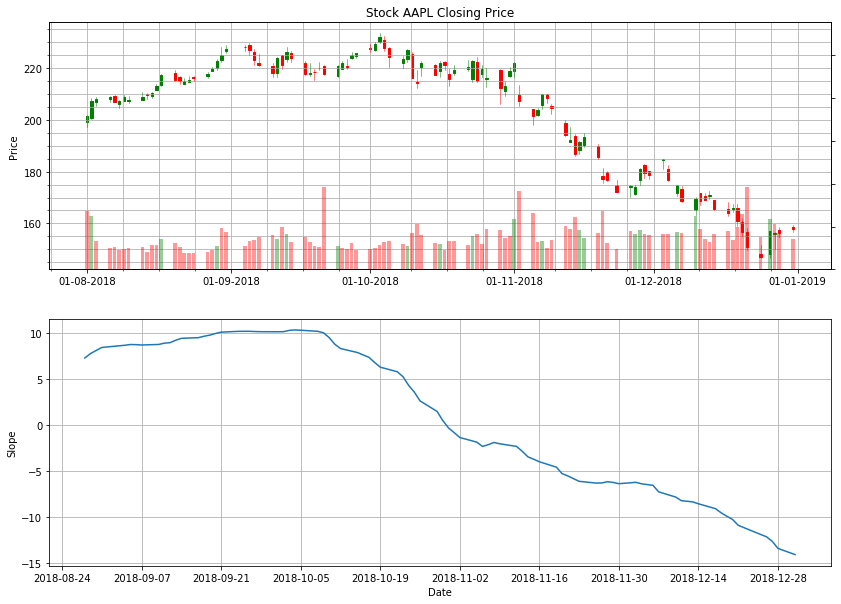

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df1.Volume.max())
ax1.set_title('Stock '+ symbol1 +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
#df1['VolumePositive'] = df1['Open'] < df1['Adj Close']
#colors = df1.VolumePositive.map({True: 'g', False: 'r'})
#ax2.bar(df1.index, df1['Volume'], color=colors, alpha=0.4)
ax2.plot(df1['Slope'], label='Slope')
ax2.grid()
ax2.set_ylabel('Slope')
ax2.set_xlabel('Date')